<a href="https://colab.research.google.com/github/gurram46/Simple-Linear-Regression/blob/main/news_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [ ]:
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [ ]:
data.columns

Index(['Newspaper', 'daily', 'sunday'], dtype='object')

# Correlation

In [ ]:
data.drop('Newspaper', axis=1,inplace=True)


In [ ]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<ipython-input-8-53316fc3da8d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['daily'])


<Axes: xlabel='daily', ylabel='Density'>

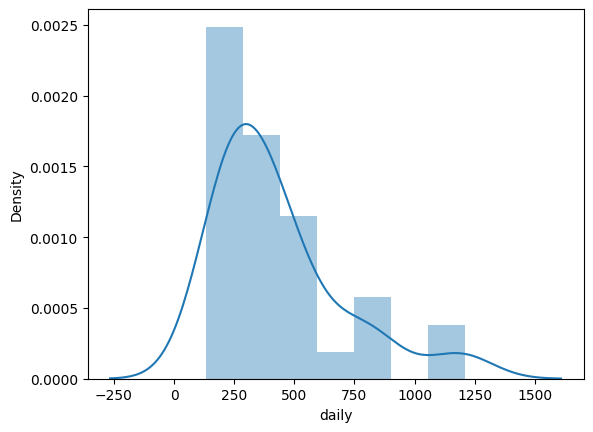

In [ ]:
import seaborn as sns
sns.distplot(data['daily'])
#diastrubation plot is mix of histogram and freqency curve

<ipython-input-9-03ab03f2f313>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

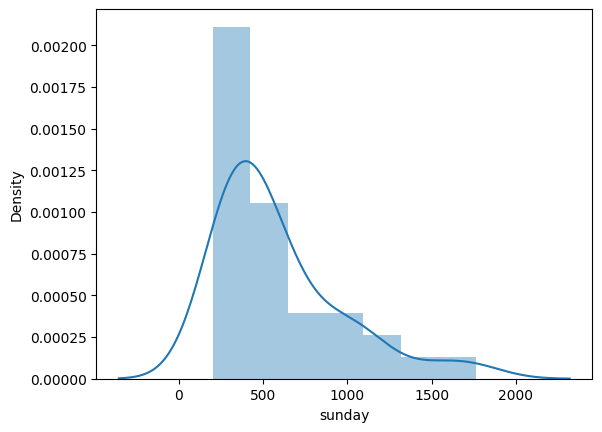

In [ ]:
import seaborn as sns
sns.distplot(data['sunday'])

# Fitting a Linear Regression Model

we are doing OLS-Ordinary Least Squares which is also called principal of least squars

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           6.02e-19
Time:                        17:01:55   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

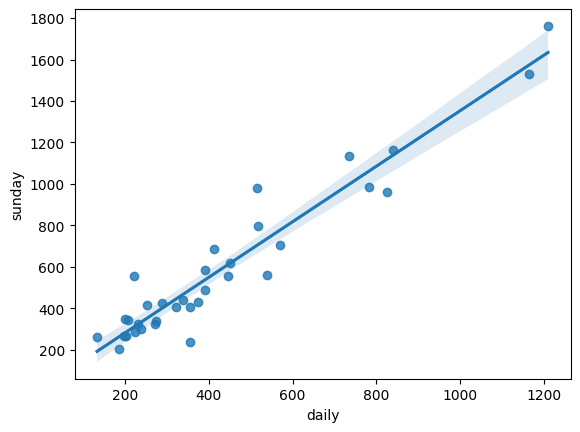

In [ ]:
sns.regplot(x="daily", y="sunday", data=data);
#regression plot between daily and sunday

y is orginal data and Yhat is the predected data

In [ ]:
#Coefficients
model.params
#if u want paramaters means intersept and slop we use model.params slop is 1.33 or Yhat yis 13.83 or intercept

,0
Intercept,13.835630
daily,1.339715


Yhat=13.83+1.33X is required line or predected line

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new data point

In [ ]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300,600,500,750])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(data_pred)

,0
0,281.778581
1,415.750057
2,817.664485
3,683.693009
4,1018.621698


dalysales |sunday

200       | 281.777

300       | 412.28

600       |811.85

        